In [64]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
import frgtools.misc as frgm

In [65]:
# fids = frgm.listdir()

In [66]:
S = pd.read_csv('AM15.csv', delimiter=',', header=0)
WL_1, power_per_nm = S.iloc[:,0], S.iloc[:,1]

In [67]:
R = pd.read_csv('reflection_export.txt', delim_whitespace=True, header=None)
WL_R, R_per_nm = R.iloc[:,0], R.iloc[:,1]
WL_R, R_per_nm = WL_R[::-1], R_per_nm[::-1]

In [68]:
T = pd.read_csv('transmission_export.txt', delim_whitespace=True, header=None)
WL_2, T_per_nm = T.iloc[:,0], T.iloc[:,1]
WL_2, T_per_nm = WL_2[::-1], T_per_nm[::-1]

In [69]:
WL_0 = np.linspace(300, 1500, 200)
WL_filltop = np.ones(200)
WL_fillbot = np.zeros(200)

## importing lumerical text files (in revese b/c lumerical recored backwards) 

In [70]:
PSK_abs = pd.read_csv('PSK_EQE.txt', delim_whitespace=True, header=None)
WL_PSK_abs, PSK_abs_per_nm = PSK_abs.iloc[:,0], PSK_abs.iloc[:,1]
WL_PSK_abs, PSK_abs_per_nm = WL_PSK_abs[::-1], PSK_abs_per_nm[::-1]

ITO_abs = pd.read_csv('ITO_top_EQE.txt', delim_whitespace=True, header=None)
WL_ITO_abs, ITO_abs_per_nm = ITO_abs.iloc[:,0], ITO_abs.iloc[:,1]
WL_ITO_abs, ITO_abs_per_nm = WL_ITO_abs[::-1], ITO_abs_per_nm[::-1]

HTL_abs = pd.read_csv('HTL_EQE.txt', delim_whitespace=True, header=None)
WL_HTL_abs, HTL_abs_per_nm = HTL_abs.iloc[:,0], HTL_abs.iloc[:,1]
WL_HTL_abs, HTL_abs_per_nm = WL_HTL_abs[::-1], HTL_abs_per_nm[::-1]

ETL_abs = pd.read_csv('ETL_EQE.txt', delim_whitespace=True, header=None)
WL_ETL_abs, ETL_abs_per_nm = HTL_abs.iloc[:,0], ETL_abs.iloc[:,1]
WL_ETL_abs, ETL_abs_per_nm = WL_ETL_abs[::-1], ETL_abs_per_nm[::-1]

SI_abs = pd.read_csv('SI_EQE.txt', delim_whitespace=True, header=None)
WL_SI_abs, SI_abs_per_nm = SI_abs.iloc[:,0], SI_abs.iloc[:,1]
WL_SI_abs, SI_abs_per_nm = WL_SI_abs[::-1], SI_abs_per_nm[::-1]

# Adjusting T monitor to exclude silicon
T_per_nm= T_per_nm+SI_abs_per_nm

## Summing Parasitic Losses and calculating Transmittance using A=1-R-T

In [71]:
PAonPSK_1 = PSK_abs_per_nm+ITO_abs_per_nm+HTL_abs_per_nm+ETL_abs_per_nm
transmittance = (1-R_per_nm) - PAonPSK_1
T_error = (transmittance-T_per_nm)
PAonPSK = 1-(R_per_nm+ITO_abs_per_nm+HTL_abs_per_nm+ETL_abs_per_nm + T_error)

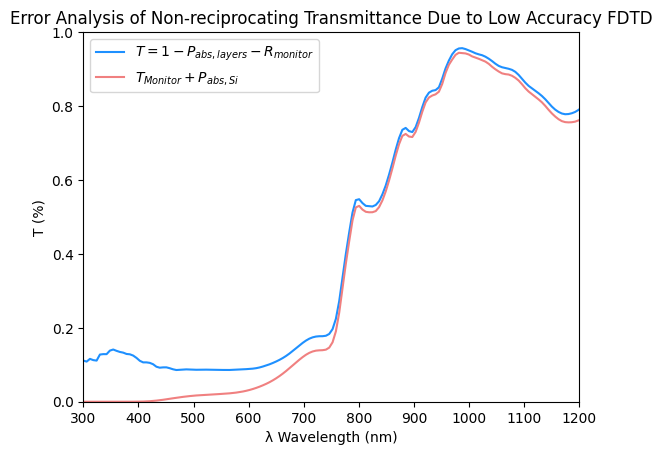

In [72]:
plt.figure(0)
plt.plot(WL_PSK_abs, transmittance, label='$T=1-P_{abs,layers}-R_{monitor}$', color='dodgerblue')
plt.plot(WL_2, T_per_nm, label='$T_{Monitor} + P_{abs,Si}$', color='lightcoral')
plt.title('Error Analysis of Non-reciprocating Transmittance Due to Low Accuracy FDTD')
plt.legend()
plt.xlabel("λ Wavelength (nm)")
plt.ylabel("T (%)")
plt.ylim(0,1)
plt.xlim(300,1200)
plt.show()

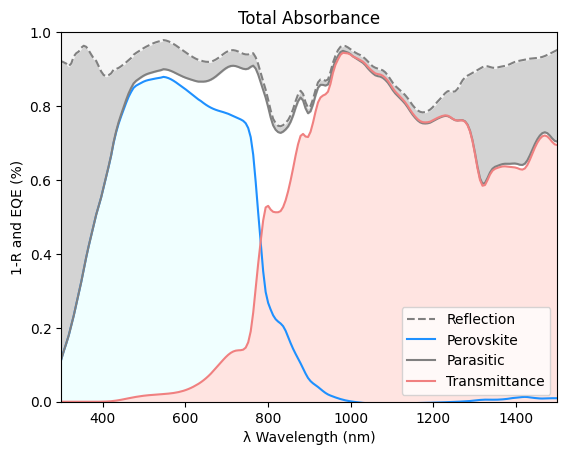

In [73]:
plt.figure(1)
plt.plot(WL_R, 1-R_per_nm, label="Reflection", color="gray", linestyle="--") #1-R
plt.plot(WL_PSK_abs, PSK_abs_per_nm, label='Perovskite', color="dodgerblue") #Perovskite Absorption
plt.plot(WL_PSK_abs, PAonPSK, label="Parasitic", color="gray", ) #Parasitic Absorption
plt.plot(WL_2, T_per_nm, label='Transmittance', color="lightcoral") # Tranmission

plt.fill_between(WL_PSK_abs, PAonPSK, 1-R_per_nm, color='lightgray')
plt.fill_between(WL_PSK_abs, WL_filltop, 1-R_per_nm,  color='whitesmoke')
plt.fill_between(WL_PSK_abs, PSK_abs_per_nm, WL_fillbot, color='azure')
plt.fill_between(WL_PSK_abs, T_per_nm, WL_fillbot, color='mistyrose' )

plt.title("Total Absorbance")
plt.ylim(0,1)
plt.xlim(300,1500)
plt.xlabel("λ Wavelength (nm)")
plt.ylabel("1-R and EQE (%)")
plt.legend()
plt.show()

## Power Absoption Calculation

In [12]:
AM15 = np.interp(WL_PSK_abs, WL_1, power_per_nm)
R_pabs = R_per_nm * AM15
PA_pabs = ((1-R_per_nm) - PAonPSK ) * AM15
PSK_pabs = PSK_abs_per_nm * AM15
T_pabs = T_per_nm * AM15

In [13]:
plt.figure(3)
plt.plot(WL_PSK_abs, AM15, label='AM15', color='black')
plt.plot(WL_PSK_abs, R_pabs, label='Reflection', color="gray", linestyle='--')
plt.plot(WL_PSK_abs, PA_pabs, label='Parasitic', color='gray')
plt.plot(WL_PSK_abs, PSK_pabs, label='Perovskite', color='dodgerblue')
plt.plot(WL_PSK_abs, T_pabs, label='Transmittance', color='lightcoral')
plt.plot(WL_PSK_abs, WL_fillbot)
plt.close()

## Color Fill, Σ consecutively to make stack plot

In [14]:
R_pabs_stack = R_pabs
PA_pabs_stack = R_pabs_stack + PA_pabs
PSK_pabs_stack = PA_pabs_stack + PSK_pabs
T_pabs_stack = PSK_pabs_stack + T_pabs

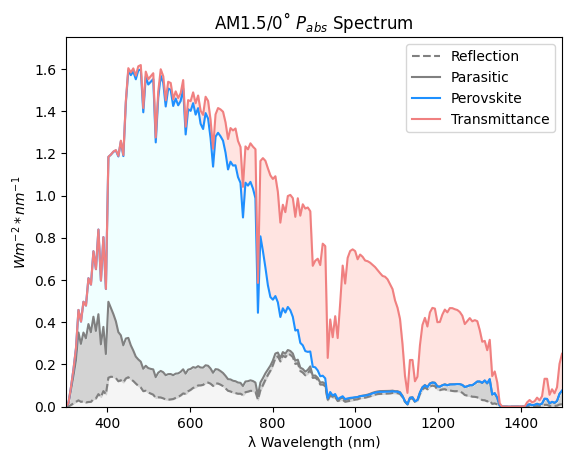

In [15]:
plt.figure(4)
plt.plot(WL_PSK_abs, R_pabs_stack, label='Reflection', color="gray", linestyle='--')
plt.fill_between(WL_PSK_abs, WL_fillbot, R_pabs_stack, color='whitesmoke')

plt.plot(WL_PSK_abs, PA_pabs_stack, label='Parasitic', color='gray')
plt.fill_between(WL_PSK_abs, R_pabs_stack, PA_pabs_stack, color='lightgray')

plt.plot(WL_PSK_abs, PSK_pabs_stack, label='Perovskite', color='dodgerblue')
plt.fill_between(WL_PSK_abs, PA_pabs_stack, PSK_pabs_stack, color='azure')

plt.plot(WL_PSK_abs, T_pabs_stack, label='Transmittance', color='lightcoral')
plt.fill_between(WL_PSK_abs, PSK_pabs_stack, T_pabs_stack, color='mistyrose')

plt.legend()
plt.title('AM$1.5/0˚$ $P_{abs}$ Spectrum ')
plt.ylim(0,1.75)
plt.xlim(300,1500)

plt.ylabel('$W m^{-2} * nm^{-1}$')
plt.xlabel("λ Wavelength (nm)")
plt.show()

## Verify Power Loss when converting spectum to match FDTD resolution

In [62]:
Rounded_AM15=np.trapz(-AM15, x=WL_PSK_abs, axis=-1) #about 10% loss
print('Rounded_AM15 =',round(Rounded_AM15,2),'W/m\u00b2')



Rounded_AM15 = 902.73 W/m²


## Calculating Pabs with ideal QE

In [63]:
R_pabs_value=np.trapz(-R_pabs, x=WL_PSK_abs)
PA_pabs_value=np.trapz(-PA_pabs, x=WL_PSK_abs)
PSK_pabs_value=np.trapz(-PSK_pabs, x=WL_PSK_abs)
T_pabs_value=np.trapz(-T_pabs, x=WL_PSK_abs)
# mA/cm\u00b2
print('R_pabs_value =',round(R_pabs_value,2),'W/m\u00b2','or', round(R_pabs_value/Rounded_AM15*100,2),'%' )
print('PA_pabs_value =',round(PA_pabs_value,2),'W/m\u00b2','or', round(PA_pabs_value/Rounded_AM15*100,2),'%' )
print('PSK_pabs_value =',round(PSK_pabs_value,2),'W/m\u00b2','or', round(PSK_pabs_value/Rounded_AM15*100,2),'%' )
print('T_pabs_value =',round(T_pabs_value,2),'W/m\u00b2','or', round(T_pabs_value/Rounded_AM15*100,2),'%' )

R_pabs_value = 83.6 W/m² or 9.26 %
PA_pabs_value = 80.68 W/m² or 8.94 %
PSK_pabs_value = 462.89 W/m² or 51.28 %
T_pabs_value = 275.55 W/m² or 30.52 %


## Calculating Jsc with ideal QE

In [60]:
R_photon=np.zeros(200)
PA_photon=np.zeros(200)
PSK_photon=np.zeros(200)
T_photon=np.zeros(200)

for n in range(0, len(PSK_pabs)):
    R_photon[n]=R_pabs[n]/(1240/WL_PSK_abs[n])
    PA_photon[n]=PA_pabs[n]/(1240/WL_PSK_abs[n])
    PSK_photon[n]=PSK_pabs[n]/(1240/WL_PSK_abs[n])
    T_photon[n]=T_pabs[n]/(1240/WL_PSK_abs[n])

R_Jsc=np.trapz(-R_photon, x=WL_PSK_abs)/10
PA_Jsc=np.trapz(-PA_photon, x=WL_PSK_abs)/10
PSK_Jsc=np.trapz(-PSK_photon, x=WL_PSK_abs)/10
T_Jsc=np.trapz(-T_photon, x=WL_PSK_abs)/10

print('R_Jsc =',round(R_Jsc,2),'mA/cm\u00b2')
print('PA_Jsc =',round(PA_Jsc,2),'mA/cm\u00b2')
print('PSK_Jsc =',round(PSK_Jsc,2),'mA/cm\u00b2')
print('T_Jsc =',round(T_Jsc,2),'mA/cm\u00b2')

R_Jsc = 5.43 mA/cm²
PA_Jsc = 3.83 mA/cm²
PSK_Jsc = 21.89 mA/cm²
T_Jsc = 21.94 mA/cm²


## Exporting T_pabs to Raytracing, plotting first

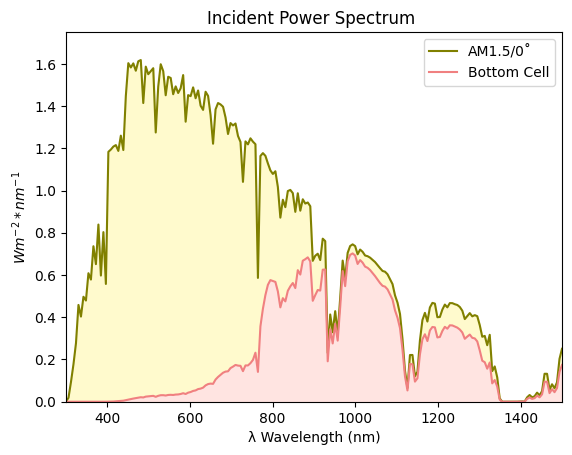

In [17]:
plt.figure(3)

T_pabs_export = pd.DataFrame({'wl':WL_PSK_abs, 'power': T_pabs})

plt.plot(WL_PSK_abs, AM15, label='AM1.5/0˚', color='olive')
plt.fill_between(WL_PSK_abs,AM15, T_pabs_export['power'], color='lemonchiffon')

plt.plot(T_pabs_export['wl'],T_pabs_export['power'], color='lightcoral', label='Bottom Cell')
plt.fill_between(WL_PSK_abs,T_pabs_export['power'], WL_fillbot, color='mistyrose')

plt.legend()
plt.title('Incident Power Spectrum ')
plt.ylim(0,1.75)
plt.xlim(300,1500)

plt.ylabel('$W m^{-2} * nm^{-1}$')
plt.xlabel("λ Wavelength (nm)")
plt.show()
plt.show()

## Export to CSV to inport into OPAL2 for Raytracing

In [18]:
with open('Conformal_Import_to_RT.csv', 'a') as f:
    T_pabs_export.to_csv(f, header=True)
# T_pabs_export

#### Deprecated Code

In [7]:
# AM15 = np.interp(WL_0, WL_1, power_per_nm)
# Trans = np.interp(WL_0, WL_PSK_abs, transmittance[::-1])
# for i in range(len(Trans)):
#     if Trans[i] < 0:
#         Trans[i] = 0
# For_RT = transmittance[::-1] * AM15

# AM15 = np.interp(WL_0, WL_1, power_per_nm)
# Trans = np.interp(WL_0, WL_2, T_per_nm)
# for i in range(len(Trans)):
#     if Trans[i] < 0:
#         Trans[i] = 0
# For_RT = Trans * AM15

# T_per_nm1 = np.interp(WL_HTL_abs, WL_2, T_per_nm)
# R_per_nm1 = np.interp(WL_HTL_abs,WL_R, R_per_nm)
# 1-(R_per_nm+ITO_abs_per_nm+HTL_abs_per_nm+ETL_abs_per_nm)
# PA_per_nm=1-R_per_nm1-(ITO_abs_per_nm+HTL_abs_per_nm+ETL_abs_per_nm)-T_per_nm


# plt.plot(WL_ETL_abs, PA_per_nm, label="PA")
# plt.plot(WL_0, WL_filltop)
# plt.plot(WL_0, WL_fillbot)
# plt.plot(WL_HTL_abs, transmittance)
# cross = WL_PSK_abs[PSK_abs_per_nm - T_per_nm>= 0][0]
# plt.fill_between(WL_PSK_abs,T_per_nm,PSK_abs_per_nm, where=(WL_PSK_abs>cross), color="yellow", alpha=.1)

# plt.plot(WL_ITO_abs, 1-ITO_abs_per_nm, label='ITO')
# plt.plot(WL_HTL_abs, 1-HTL_abs_per_nm, label='HTL')
# plt.plot(WL_ETL_abs, 1-ETL_abs_per_nm, label='ETL')

# plt.plot(WL_SI_abs, SI_abs_per_nm, label='Top 3µm of Si', color="lightcoral")